# For the course : https://snap.stanford.edu/class/cs224w-2019/

## Downloading the data

In [ ]:
!curl https://snap.stanford.edu/data/wiki-Vote.txt.gz --output /content/wiki-Vote.txt.gz
!gunzip /content/wiki-Vote.txt.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  283k  100  283k    0     0   274k      0  0:00:01  0:00:01 --:--:--  274k


## Parsing the data in networkX graph

In [ ]:
!cat wiki-Vote.txt | head -n 10

# Directed graph (each unordered pair of nodes is saved once): Wiki-Vote.txt 
# Wikipedia voting on promotion to administratorship (till January 2008). Directed edge A->B means user A voted on B becoming Wikipedia administrator.
# Nodes: 7115 Edges: 103689
# FromNodeId	ToNodeId
30	1412
30	3352
30	5254
30	5543
30	7478
3	28


In [ ]:
import networkx as nx

# Storing/keeping only the lines that has the edge information

data_path = '/content/wiki-Vote.txt'
data_stream = open(data_path, 'r').read().split('\n')[5:-1]

# Extracting the edges into a list

edges_list = []
for edge_info in data_stream:
  source, dest = edge_info.split('\t')
  edges_list.append((source, dest))

# Creating a directed graph
G = nx.DiGraph()

# Populating the graph
G.add_edges_from(edges_list)

print(list(G.edges)[:10])

[('30', '3352'), ('30', '5254'), ('30', '5543'), ('30', '7478'), ('3352', '72'), ('3352', '285'), ('3352', '417'), ('3352', '465'), ('3352', '608'), ('3352', '762')]


## 1 Analyzing the Wikipedia voters network [27 points]

### 1.1 The number of nodes in the network.

In [ ]:
len(G.nodes)

7115

### 1.2 The number of nodes with a self-edge (self-loop), i.e., the number of nodes a ∈ V where (a, a) ∈ E.

In [ ]:
self_edge_counter = 0
for edge in set(G.edges): # Iterate through the original list of edges
  source, dest = edge
  if source == dest:
    self_edge_counter += 1
print(f"The number of nodes with self loops are {self_edge_counter}")

The number of nodes with self loops are 0


### 1.3 The number of directed edges in the network, i.e., the number of ordered pairs (a, b) ∈ E for which a != b.

In [ ]:
directed_edges = 0
for edge in G.edges:
  source, dest = edge
  if source != dest:
    directed_edges += 1

print(f"The number of directed edges for which there are different source, and dest are {directed_edges}")

The number of directed edges for which there are different source, and dest are 103688


### 1.4 The number of undirected edges in the network, i.e., the number of unique unordered pairs (a, b), a != b, for which (a, b) ∈ E or (b, a) ∈ E (or both). If both (a, b) and (b, a) are edges, this counts a single undirected edge.

In [ ]:
nodes_seen_so_far = set()
undirected_edges = 0

for node in G.nodes:
  for neighbour in G.adj[node]:
    if node == neighbour or neighbour in nodes_seen_so_far:
      continue # Avoid counting twice
    else:
      undirected_edges += 1
  nodes_seen_so_far.add(node)

print("The number of undirected edges in the network are : ", undirected_edges)

The number of undirected edges in the network are :  35886


 ### 1.5 The number of reciprocated edges in the network, i.e., the number of unique unordered pairs of nodes (a, b), a != b, for which (a, b) ∈ E and (b, a) ∈ E.

In [ ]:
nodes_seen_so_far = set()
reciprocated_edges = 0

for node in G.nodes:
  for neighbour in G.adj[node]:
    if node != neighbour and neighbour not in nodes_seen_so_far and G.has_edge(neighbour, node):
      reciprocated_edges += 1 # Count once the recriprocated edge
    else:
      continue
  nodes_seen_so_far.add(node)

print("The number of reciprocated edges in the network are : ", reciprocated_edges)

The number of reciprocated edges in the network are :  2927


### 1.6 The number of nodes of zero out-degree.

In [ ]:
nodes_with_zero_out_degree = 0

for node in G.nodes:
  if not G.out_degree(node):
    nodes_with_zero_out_degree += 1

print(f"The number of nodes with 0 out degrees are {nodes_with_zero_out_degree}")

The number of nodes with 0 out degrees are 1005


### 1.7 The number of nodes of zero in-degree.

In [ ]:
nodes_with_zero_in_degree = 0

for node in G.nodes:
  if not G.in_degree(node):
    nodes_with_zero_in_degree += 1

print(f"The number of nodes with 0 in degrees are {nodes_with_zero_in_degree}")

The number of nodes with 0 in degrees are 4734


### 1.8 The number of nodes with more than 10 outgoing edges

In [ ]:
nodes_with_mode_than_10_out_degree = 0

for node in G.nodes:
  if G.out_degree(node) > 10:
    nodes_with_mode_than_10_out_degree += 1

print(f"The number of nodes with greater than 10 out degrees are {nodes_with_mode_than_10_out_degree}")

The number of nodes with greater than 10 out degrees are 1612


### 1.9 The number of nodes with more than 10 incoming edges

In [ ]:
nodes_with_mode_than_10_in_degree = 0

for node in G.nodes:
  if G.in_degree(node) > 10:
    nodes_with_mode_than_10_in_degree += 1

print(f"The number of nodes with greater than 10 in degrees are {nodes_with_mode_than_10_in_degree}")

The number of nodes with greater than 10 in degrees are 1906


## 2. Further Analyzing the Wikipedia voters network [33 points]


### 2.1 (18 points) Plot the distribution of out-degrees of nodes in the network on a log-log scale. Each data point is a pair (x, y) where x is a positive integer and y is the number of nodes in the network with out-degree equal to x. Restrict the range of x between the minimum and maximum out-degrees. You may filter out data points with a 0 entry. For the log-log scale, use base 10 for both x and y axes.

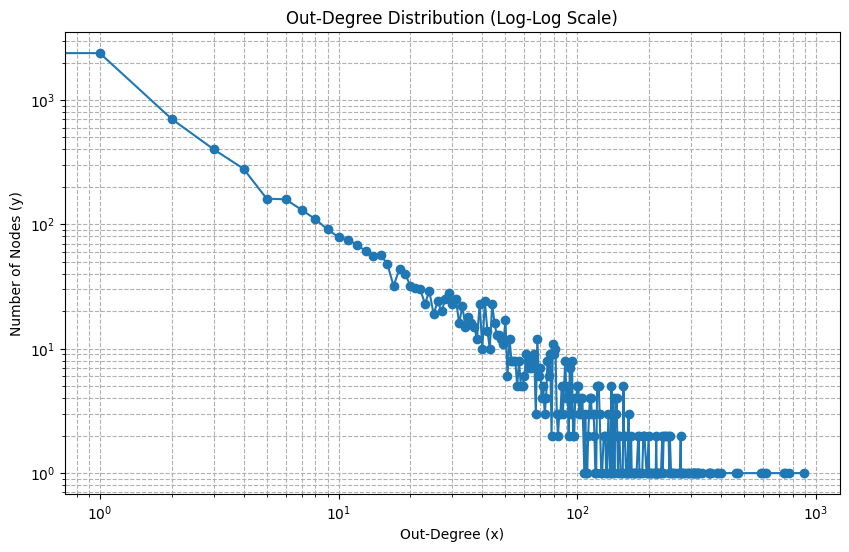

In [ ]:
import matplotlib.pyplot as plt
import collections

out_degrees = [degree for node, degree in G.out_degree()]
degree_counts = collections.Counter(out_degrees)

# Sort the degree_counts by degree
sorted_degree_counts = sorted(degree_counts.items())

# Extract degrees and their counts
degrees, counts = zip(*sorted_degree_counts)

# Plot on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(degrees, counts, marker='o', linestyle='-')
plt.title('Out-Degree Distribution (Log-Log Scale)')
plt.xlabel('Out-Degree (x)')
plt.ylabel('Number of Nodes (y)')
plt.grid(True, which="both", ls="--")
plt.show()

### 2.2 Compute and plot the least-square regression line for the out-degree distribution in the log-log scale plot. Note we want to find coefficients a and b such that the function log10 y = a · log10 x + b, equivalently, y = 10^b· x^a , best fits the out-degree distribution. What are the coefficients a and b? For this part, you might want to use the method called polyfit in NumPy with deg parameter equal to 1.


The coefficient a is: -1.2810393741053943
The coefficient b is: 3.1323992475827924


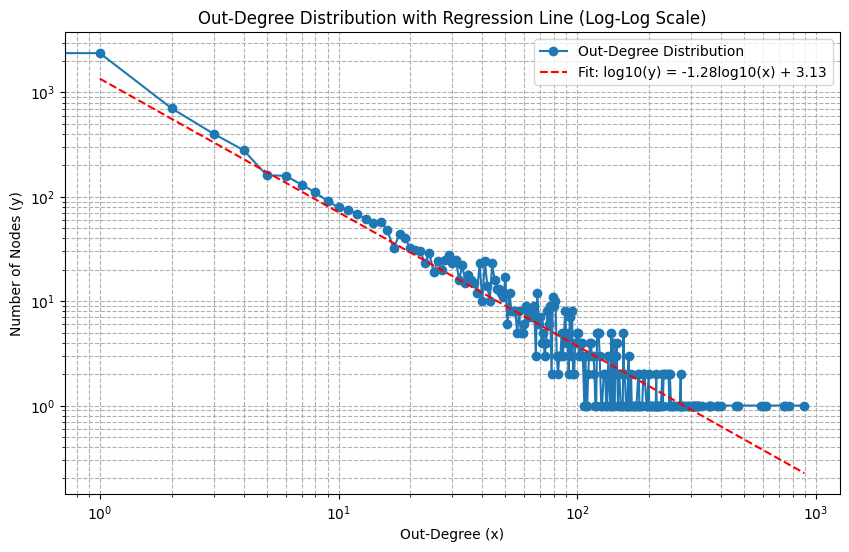

In [ ]:
import matplotlib.pyplot as plt
import collections
import numpy as np

out_degrees = [degree for node, degree in G.out_degree()]
degree_counts = collections.Counter(out_degrees)

# Sort the degree_counts by degree
sorted_degree_counts = sorted(degree_counts.items())

# Extract degrees and their counts, filtering out degrees with count 0
filtered_degrees = [d for d, c in sorted_degree_counts if c > 0 and d > 0]
filtered_counts = [c for d, c in sorted_degree_counts if c > 0 and d > 0]


# Convert to numpy arrays for calculations and take the log10
log_degrees = np.log10(filtered_degrees)
log_counts = np.log10(filtered_counts)

# Compute the least-square regression line (log10 y = a * log10 x + b)
a, b = np.polyfit(log_degrees, log_counts, 1)

print(f"The coefficient a is: {a}")
print(f"The coefficient b is: {b}")

# Plot the original data and the fitted line on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(degrees, counts, marker='o', linestyle='-', label='Out-Degree Distribution')
plt.loglog(filtered_degrees, 10**(a * log_degrees + b), color='red', linestyle='--', label=f'Fit: log10(y) = {a:.2f}log10(x) + {b:.2f}')

plt.title('Out-Degree Distribution with Regression Line (Log-Log Scale)')
plt.xlabel('Out-Degree (x)')
plt.ylabel('Number of Nodes (y)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

In [ ]:
filtered_degrees

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 126,
 127,
 129,
 131,
 132,
 133,
 135,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 152,
 153,
 155,
 156,
 157,
 158,
 160,
 161,
 162,
 164,
 165,
 166,
 168,
 169,
 172,
 173,
 175,
 177,
 180,
 181,
 182,
 183,
 187,
 189,
 190,
 191,
 195,
 196,
 199,
 200,
 202,
 204,
 205,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
